# **Predictive Analytics Proyek Machine Learning Terapan**
- **Nama:** Muhammad Makarim
- **Email:** mmakarim9@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1427

# **Business Understanding**

Proyek ini bertujuan untuk melakukan analisis prediktif terhadap perilaku sosial dan trait kepribadian individu dengan menganalisis dataset yang berisi respons mengenai pengalaman sosial mereka. Fokus utama dari penelitian ini adalah untuk memahami bagaimana sifat kepribadian, terutama perbedaan antara introvert dan extrovert, mempengaruhi keterlibatan sosial serta emosi yang dialami setelah berpartisipasi dalam aktivitas sosial.

Rumusan Masalah:
1. Apa hubungan antara "time spent alone," "social event attendance," dan "stage fear" dengan tipe kepribadian individu?
2. Bagaimana individu dengan kepribadian introvert dan extrovert berbeda dalam keterlibatan sosial mereka?
3. Apa peran dari variabel seperti "drained after socialization" dan "post frequency" dalam mempengaruhi perilaku individu di media sosial?

# **Data Loading**

Proses data loading merupakan tahap import dan load `dataset.csv` yang nantinya akan digunakan dalam komputasi. Dalam konteks analisis kepribadian, tahap ini memiliki peran kritis dalam mempersiapkan infrastruktur komputasi dan mengakses dataset yang akan diteliti.

### **Import dan download library yang akan digunakan**

In [1]:
!pip install --quiet gdown

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown
%matplotlib inline
import seaborn as sns

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### **Load dataset personality yang akan digunakan**

In [4]:
file_id = '1_-IURMcjlbBYYE4p0xLepI4yVGJdEbHr'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

output = 'Personality.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1_-IURMcjlbBYYE4p0xLepI4yVGJdEbHr
To: /content/Personality.csv
100%|██████████| 107k/107k [00:00<00:00, 40.6MB/s]


'Personality.csv'

### **Menampilkan 5 data teratas di dataset**

In [5]:
df_personality = pd.read_csv(output)
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **Exploratory Data Analysis - Personality (Data Understanding)**

### **Data Understanding**

Dataset ini memiliki beberapa variabel yang berhubungan dengan perilaku sosial dan sifat kepribadian individu. Berikut adalah deskripsi dasar dari setiap variabel:
1. `Time_spent_Alone`:
*   Tipe: Numerik
*   Deskripsi: Mengindikasikan jumlah waktu, dalam jam, yang dihabiskan sendirian dalam seminggu.

2. `Stage_fear`:
*   Tipe: Kategorikal (Ya/Tidak)
*   Deskripsi: Menunjukkan apakah individu memiliki rasa takut saat tampil di depan umum.

3. `Social_event_atte`:
*   Tipe: Kategorikal (Ya/Tidak)
*   Deskripsi: Menunjukkan apakah individu menghadiri acara sosial.

4. `Drained_after_so`:
*   Tipe: Kategorikal (Ya/Tidak)
*   Deskripsi: Menunjukkan apakah individu merasa kelelahan setelah berinteraksi sosial.

5. `Friends_circle_si`:
*   Tipe: Numerik
*   Deskripsi: Menunjukkan ukuran lingkaran pertemanan individu.

6. `Post_frequency`:
*   Tipe: Numerik
*   Deskripsi: Mengindikasikan frekuensi individu dalam memposting di media sosial.

7. `Personality`:
*   Tipe: Kategorikal (Introvert/Ekstrovert)
*  Deskripsi: Klasifikasi kepribadian individu berdasarkan hasil analisis.




### **Deskripsi Dataset**

In [6]:
# Statistik deskriptif untuk variabel numerik
print(df_personality.describe())

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max              15.000000       10.

### **Grafik distribusi per kolomnya**

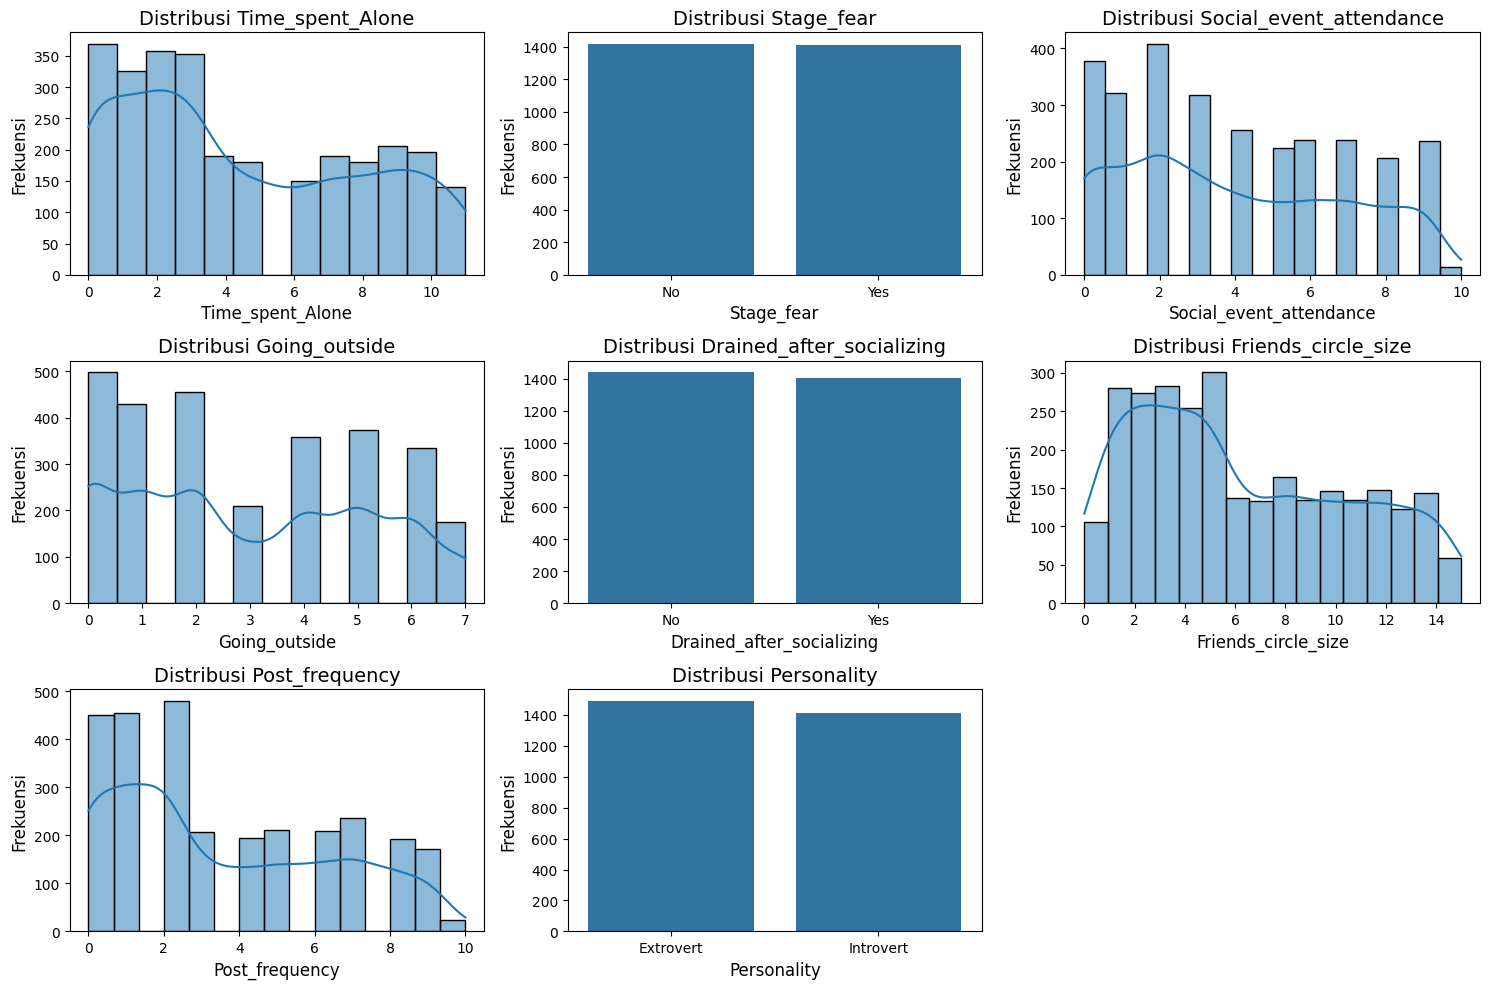

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(15, 10))

# Menghitung jumlah kolom untuk histogram
n_cols = len(df_personality.columns)

# Membuat subplot untuk setiap kolom
for i, column in enumerate(df_personality.columns, 1):
    plt.subplot(3, 3, i)  # Menyesuaikan ukuran grid
    if df_personality[column].dtype == 'object':
        sns.countplot(x=column, data=df_personality)
    else:
        sns.histplot(df_personality[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### **Distribusi data per kolomnya dalam bentuk box plot**

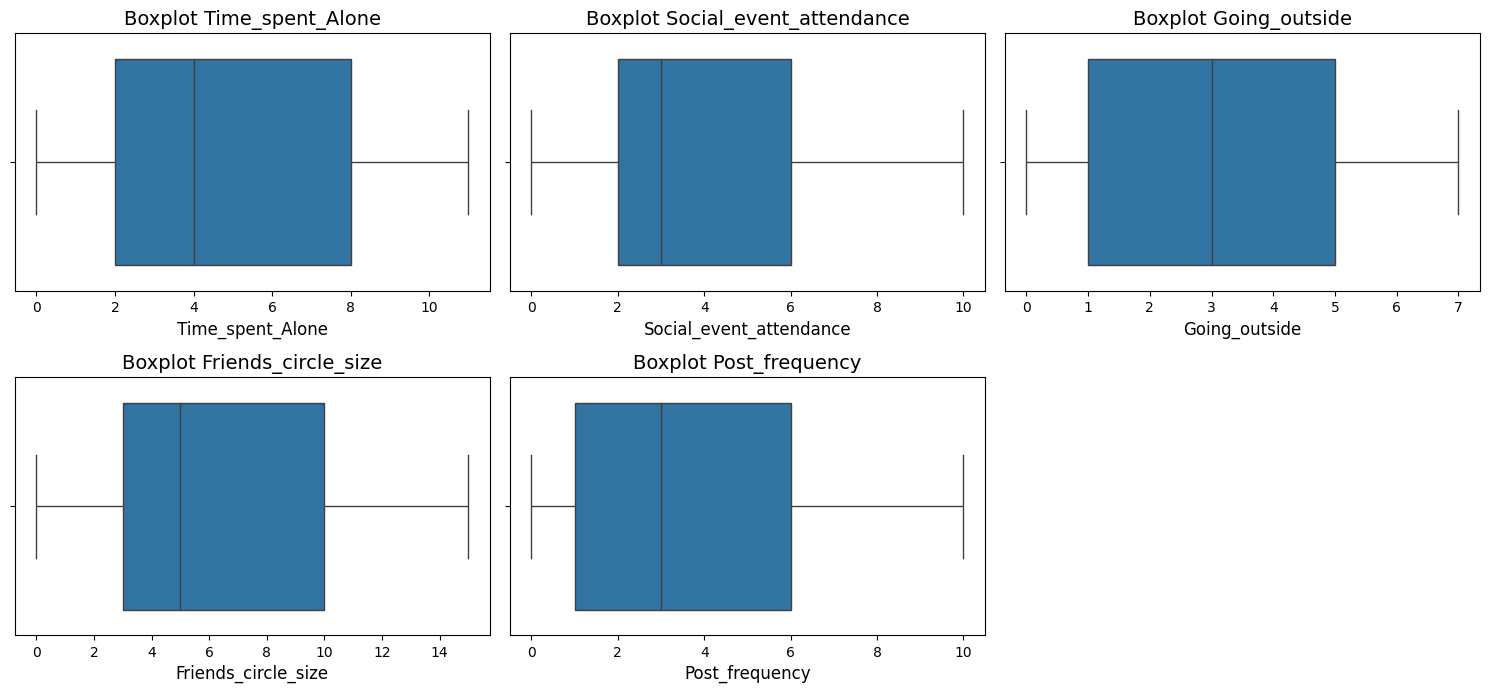

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(15, 10))

# Membuat subplot untuk setiap kolom numerik
for i, column in enumerate(df_personality.select_dtypes(include='number').columns, 1):
    plt.subplot(3, 3, i)  # Menyesuaikan ukuran grid
    sns.boxplot(x=df_personality[column])
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## **Mengidentifikasi Missing Values dan Data Duplikat**

### **Identifikasi Missing Values**

In [7]:
# Mengidentifikasi missing values
missing_values = df_personality.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
dtype: int64


### **Identifikasi Duplikasi Data**

In [8]:
duplicate_count = df_personality.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 388


## **Menangani Missing Value**

### **Menghapus baris yang mempunyai missing values dan duplikat**

In [9]:
# Menghapus baris dengan missing values
df_personality.dropna(axis=0, inplace=True)

In [13]:
df_personality = df_personality.drop_duplicates()

### **Mengecek Missing Values dan Duplikat kembali**

In [14]:
# Mengidentifikasi missing values
missing_values = df_personality.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [15]:
duplicate_count = df_personality.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


### **Mengecek shape dari Dataframe**

In [16]:
# Cek ukuran data untuk memastikan baris sudah di-drop
df_personality.shape

(2098, 8)

## **Menangani Outliers**

### **Menghitung Q1, Q3 dan IQR. Selain itu Menentukan batas bawah atas dan menyimpan informasi outlier jika ada nanti**

In [17]:
# Menghitung Q1, Q3, dan IQR untuk setiap kolom numerik
for column in df_personality.select_dtypes(include='number').columns:
    Q1 = df_personality[column].quantile(0.25)
    Q3 = df_personality[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyimpan informasi tentang outliers
    outliers = df_personality[(df_personality[column] < lower_bound) | (df_personality[column] > upper_bound)]
    print(f'Outliers for {column}:\n', outliers)

Outliers for Time_spent_Alone:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Social_event_attendance:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Going_outside:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Friends_circle_size:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []
Outliers for Post_frequency:
 Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained

### **Menghapus outliers**

In [18]:
# Menghapus outliers untuk setiap kolom numerik
for column in df_personality.select_dtypes(include='number').columns:
    Q1 = df_personality[column].quantile(0.25)
    Q3 = df_personality[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_personality = df_personality[(df_personality[column] >= lower_bound) & (df_personality[column] <= upper_bound)]

### **Visualisasi untuk mengecek apakah masih ada outliers**

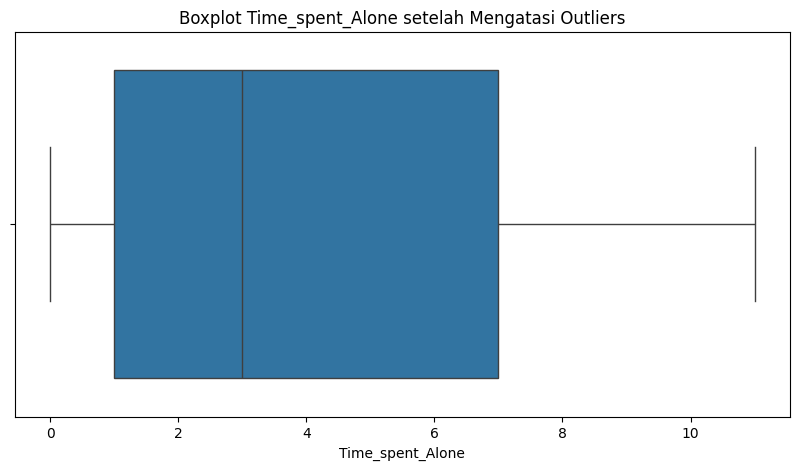

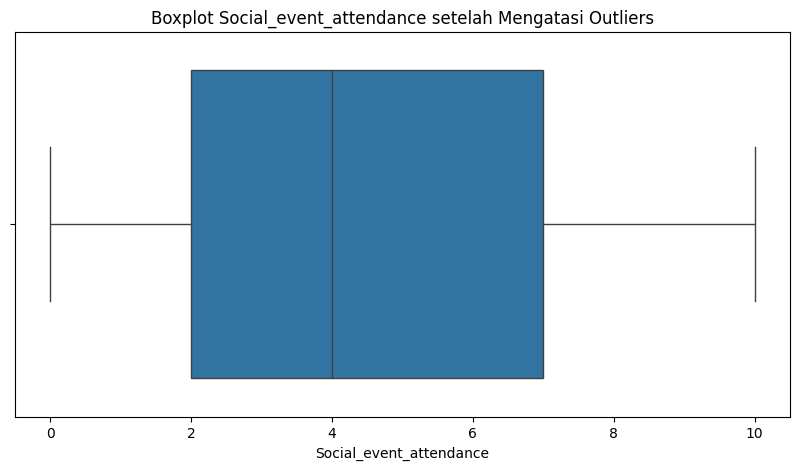

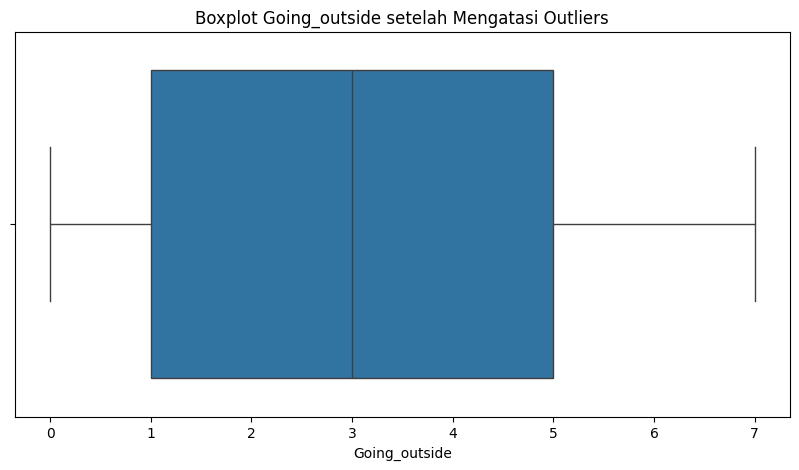

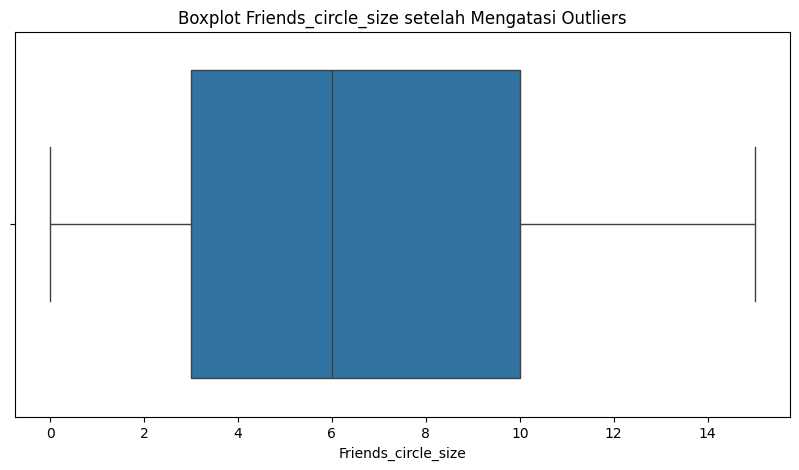

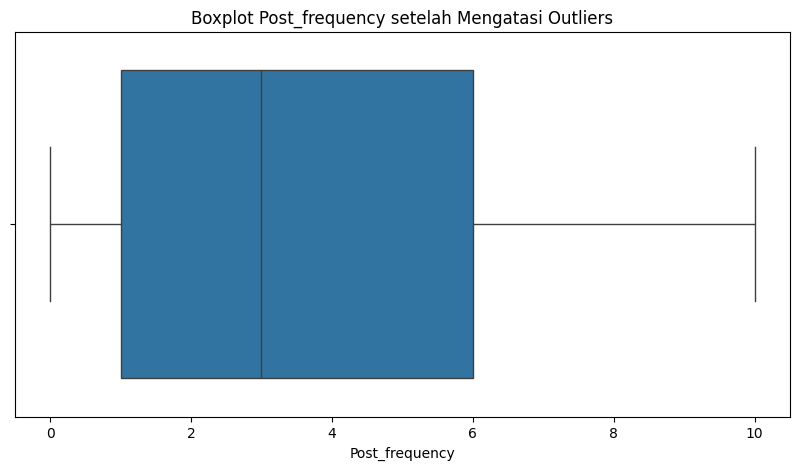

In [19]:
# Memeriksa kembali distribusi setelah penanganan outliers
for column in df_personality.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_personality[column])
    plt.title(f'Boxplot {column} setelah Mengatasi Outliers')
    plt.xlabel(column)
    plt.show()

# **Univariate Analysis**

## **Categorical Feature**

### **Grafik distribusi Univariate untuk kolom kategorikal**

<ipython-input-21-1671658199>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_personality, palette='Set2')
<ipython-input-21-1671658199>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_personality, palette='Set2')


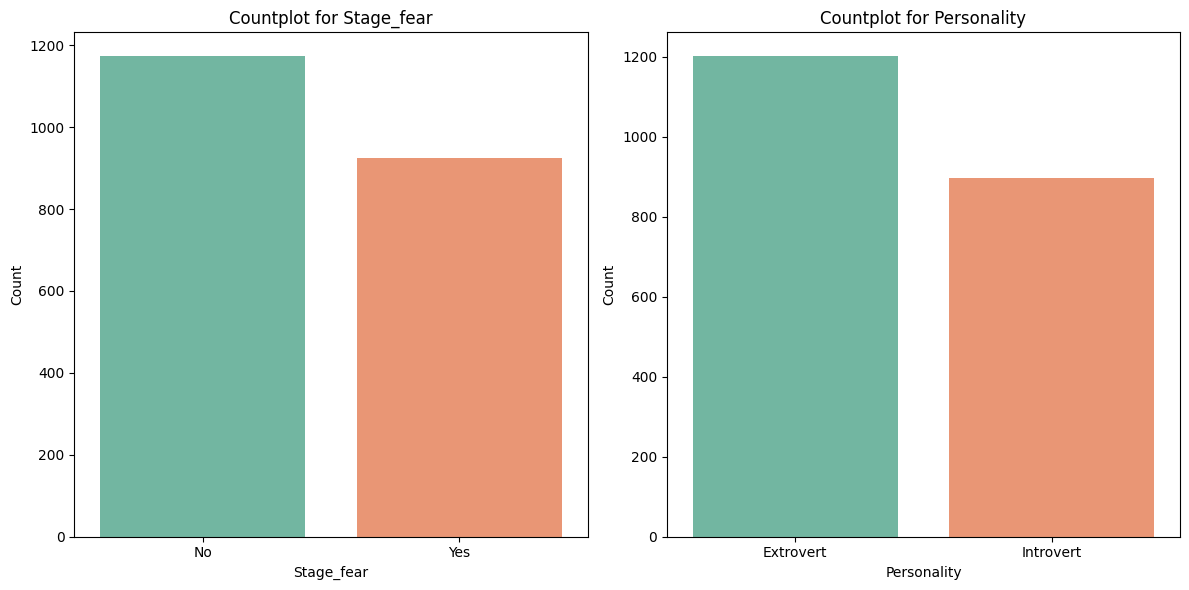

In [21]:
# Grafik Countplot untuk kolom kategorikal
categorical_features = ['Stage_fear', 'Personality']

plt.figure(figsize=(12, 6))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(x=column, data=df_personality, palette='Set2')
    plt.title(f'Countplot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## **Numerical Feature**

### **Grafik distribusi Univariate untuk fitur numerik**

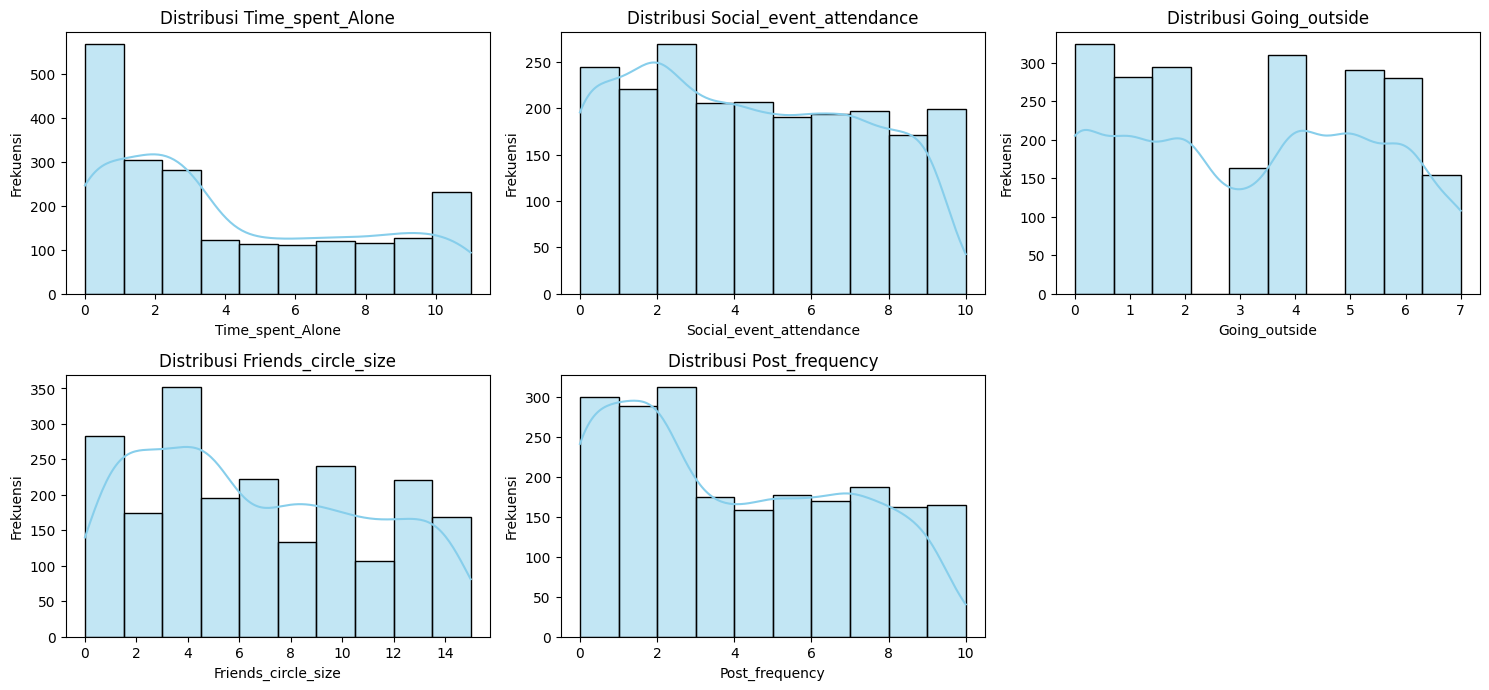

In [22]:
# Grafik Histogram dan Boxplot untuk fitur numerik
numerical_features = df_personality.select_dtypes(include='number').columns

# Histogram
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # menyesuaikan ukuran grid
    sns.histplot(df_personality[column], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Distribusi variabel memperlihatkan keragaman perilaku sosial, dengan "Time_spent_Alone" condong ke waktu singkat, "Social_event_attendance" berfrekuensi sedang, dan "Friends_circle_size" mendekati distribusi normal. Setiap histogram mengungkapkan pola unik aktivitas sosial, mulai dari keterlibatan acara, lingkaran pertemanan, hingga frekuensi posting, yang menggambarkan kompleksitas dan keberagaman karakteristik individu dalam sampel penelitian.

### **Distribusi fitur numerik dalam bentuk boxplot**

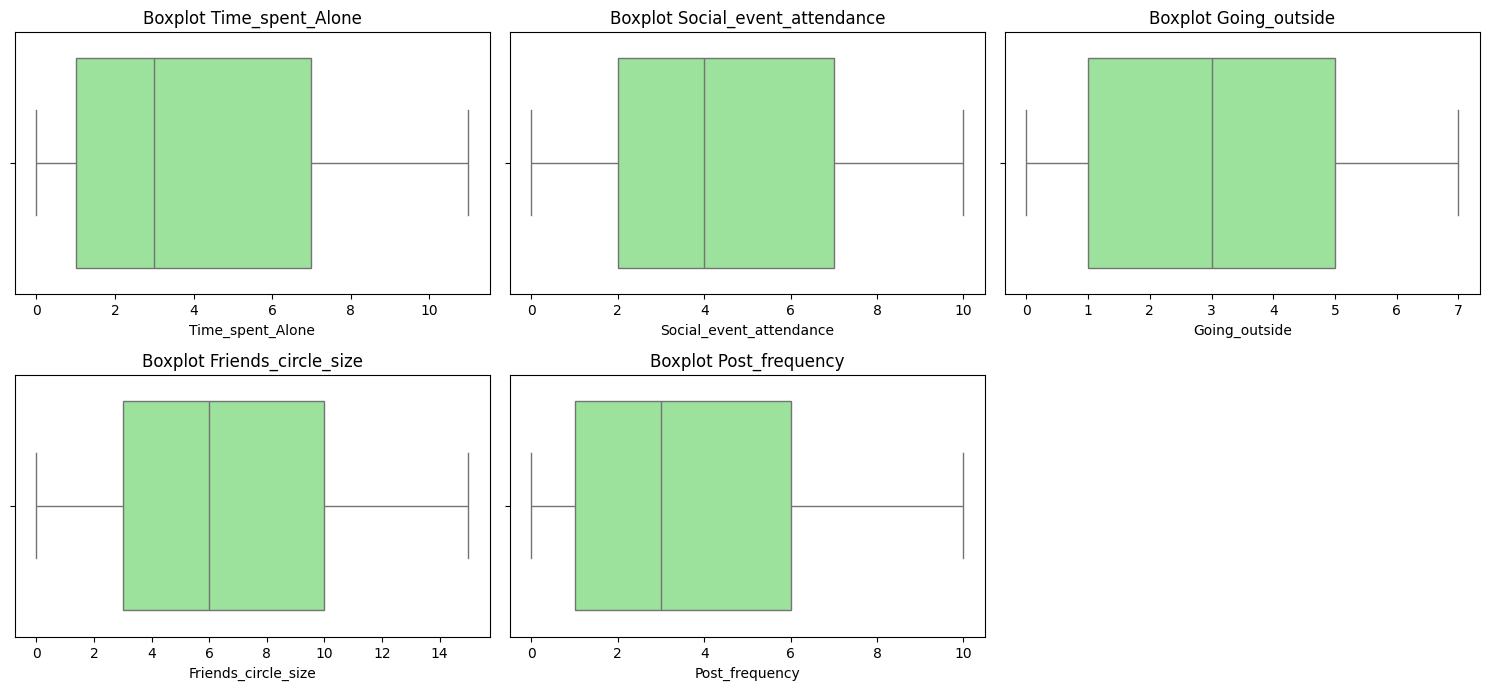

In [23]:
# Boxplot
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # menyesuaikan ukuran grid
    sns.boxplot(x=df_personality[column], color='lightgreen')
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# **Exploratory Data Analysis - Multivariate Analysis**

### **Menampilkan informasi 5 data teratas dalam Dataframe**

In [24]:
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


### **Maping kolom kategorikal menjadi numerik agar mudah di proses nantinya**

In [25]:
# Mapping kolom kategorikal menjadi numerik
df_personality['Stage_fear'] = df_personality['Stage_fear'].map({'No': 0, 'Yes': 1})
df_personality['Drained_after_socializing'] = df_personality['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

### **Maping kolom personality menjadi kategorikal**

In [26]:
# Mengganti tipe Personality menjadi kategori, jika perlu
df_personality['Personality'] = df_personality['Personality'].astype('category')

### **Mengecek hasil pergantian tipe sebelumnya**

In [27]:
print(df_personality.dtypes)

Time_spent_Alone              float64
Stage_fear                      int64
Social_event_attendance       float64
Going_outside                 float64
Drained_after_socializing       int64
Friends_circle_size           float64
Post_frequency                float64
Personality                  category
dtype: object


### **Heatmap korelasi antara variabel numerik**

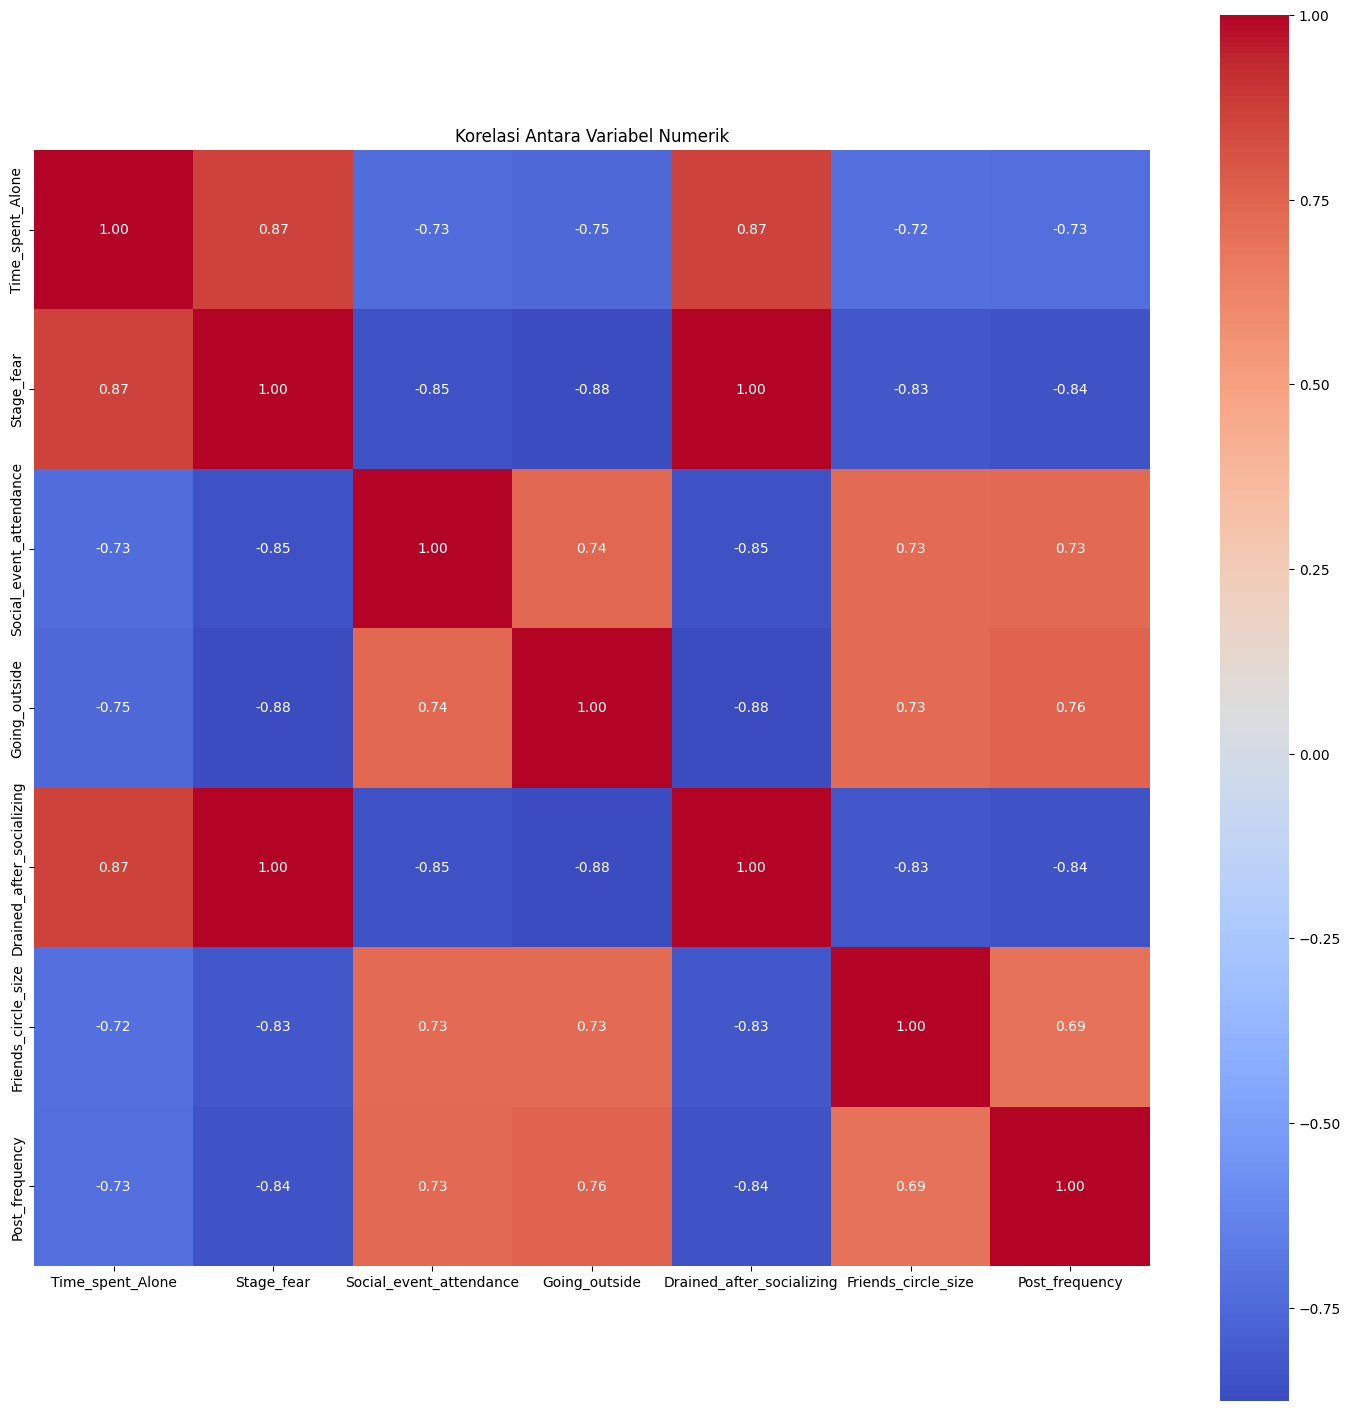

In [28]:
# Menghitung korelasi
correlation_matrix = df_personality.corr(numeric_only=True)

# Membuat heatmap untuk melihat korelasi
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korelasi Antara Variabel Numerik')
plt.show()

Heatmap korelasi ini menampilkan hubungan antarvariabel numerik dalam dataset kepribadian, dengan warna merah menandakan korelasi positif kuat dan biru menandakan korelasi negatif. Beberapa hubungan menarik terlihat, seperti korelasi tinggi antara ketakutan panggung (stage fear) dengan variabel lain, dan hubungan terbalik antara waktu yang dihabiskan sendirian dengan kehadiran acara sosial. Variabel seperti `friends_circle_size` dan `post_frequency` menunjukkan korelasi positif, mengindikasikan bahwa individu dengan lingkaran pertemanan lebih luas cenderung lebih aktif di media sosial. Secara keseluruhan, heatmap ini menggambarkan kompleksitas interkoneksi faktor-faktor kepribadian, di mana perubahan satu variabel dapat mempengaruhi variabel lainnya dalam jaringan perilaku sosial yang rumit.

### **Pairplot korelasi seluruh fitur terhadap fitur utama yaitu Personality**

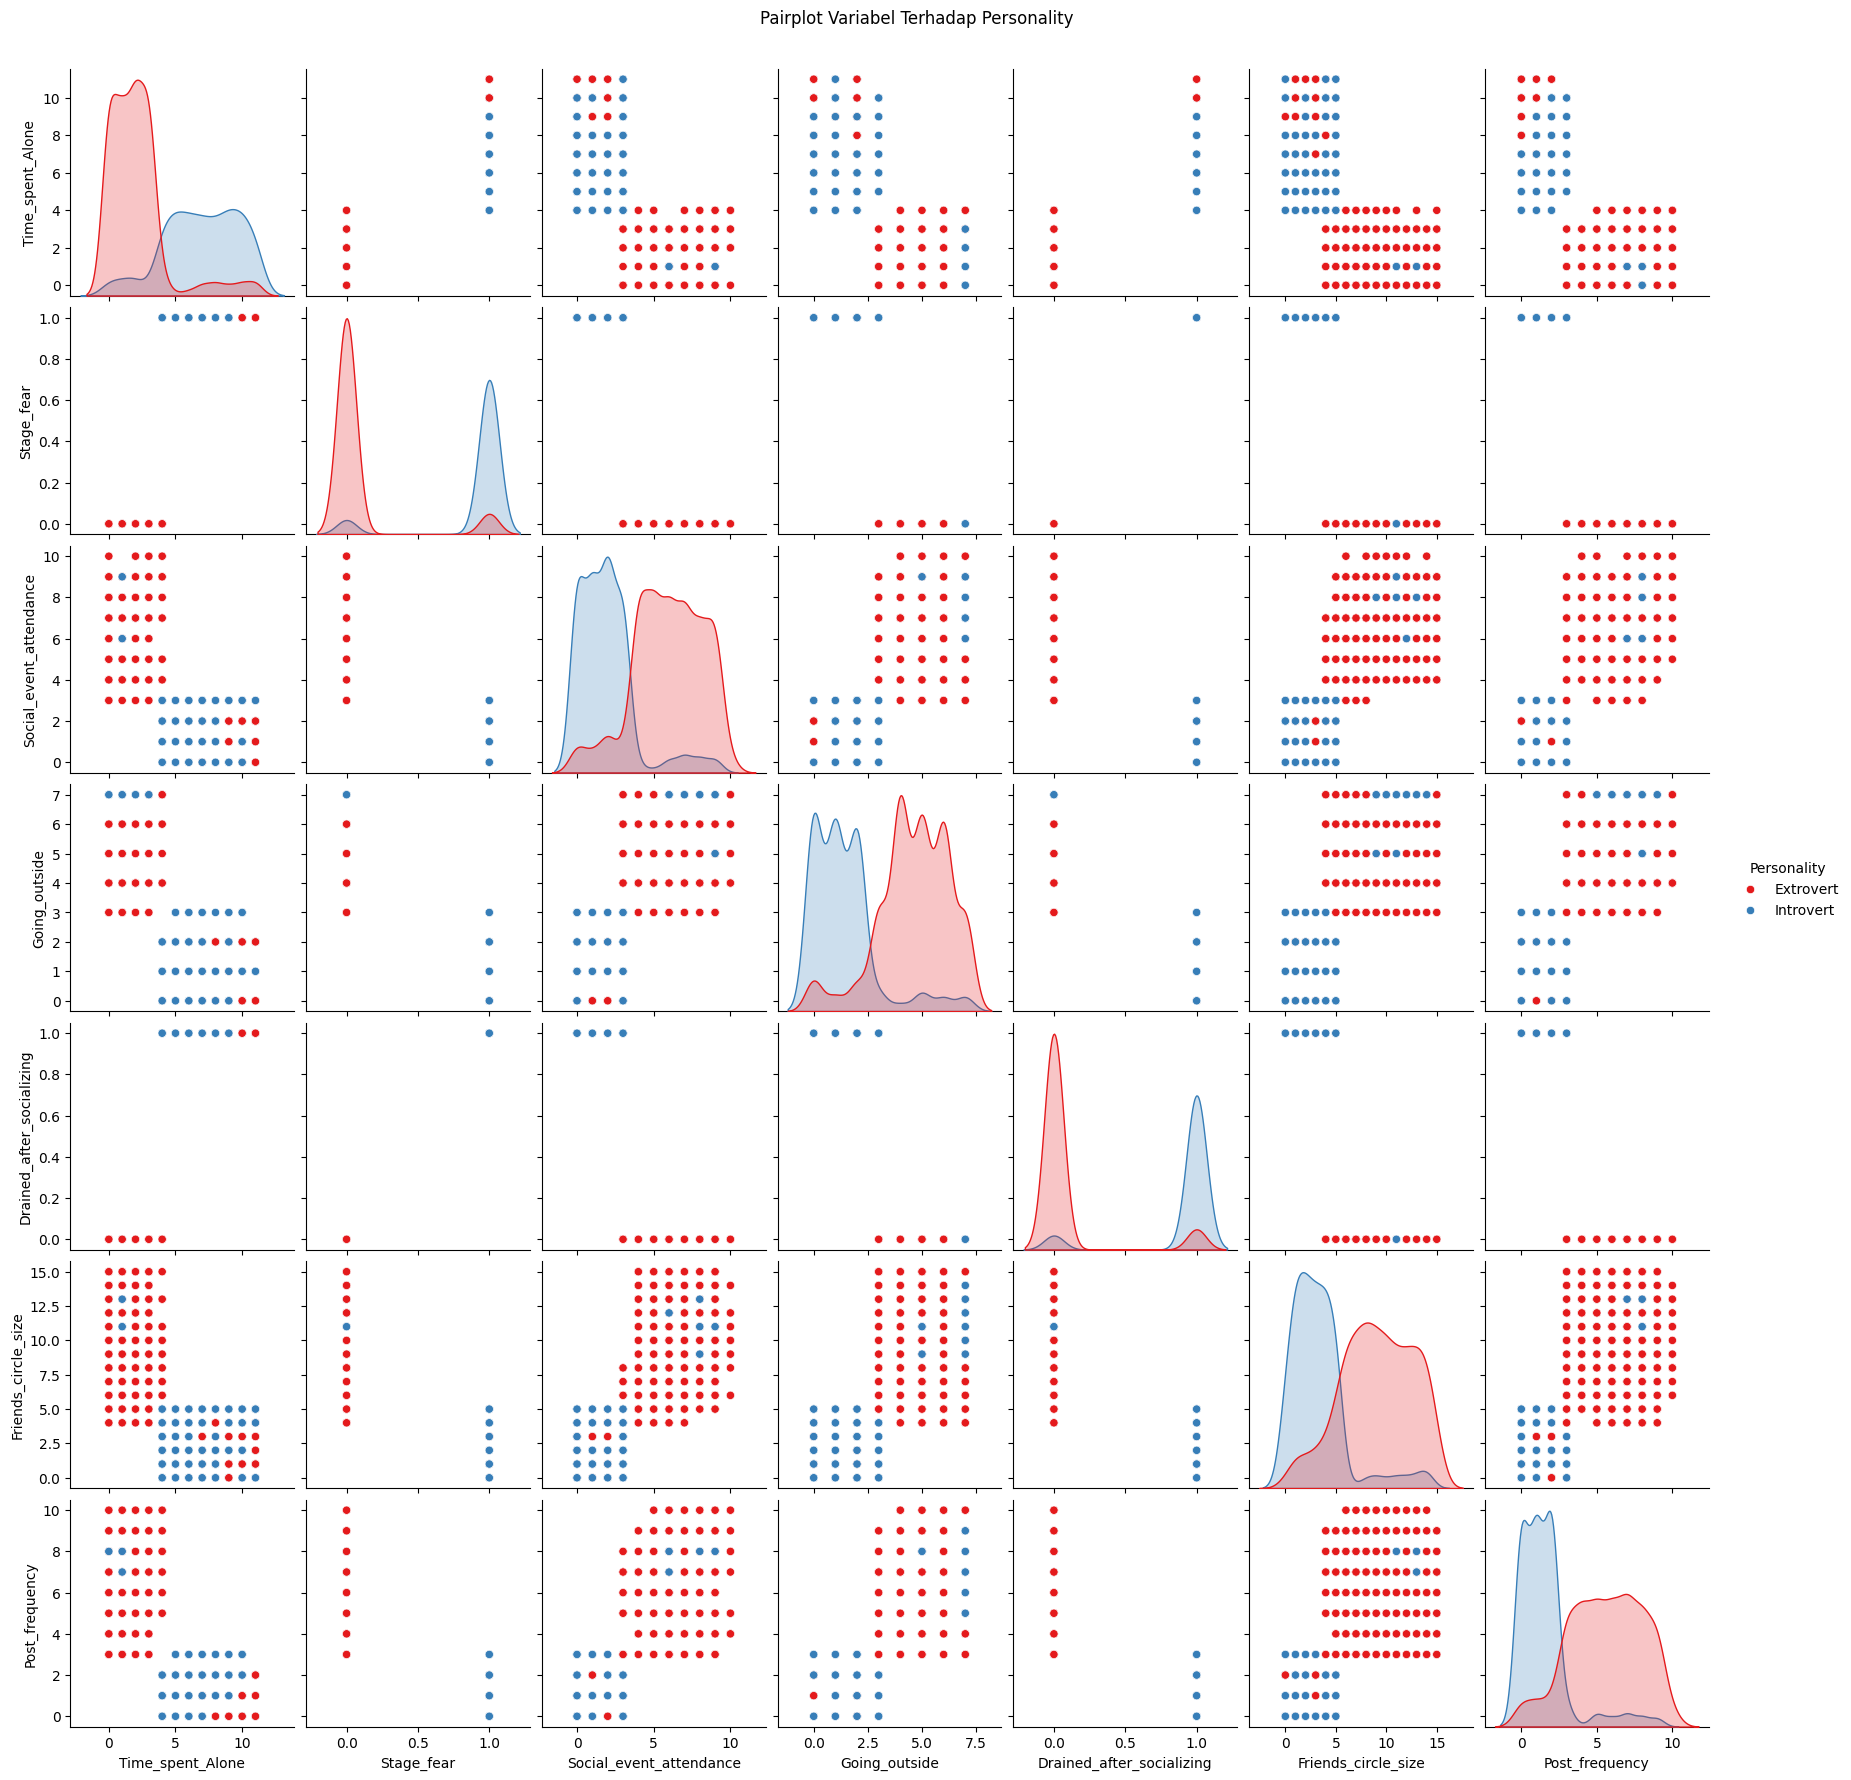

In [29]:
# Menggunakan Pairplot
sns.pairplot(df_personality, hue='Personality', palette='Set1')
plt.suptitle('Pairplot Variabel Terhadap Personality', y=1.02)
plt.show()

Pairplot ini menampilkan kepribadian Extrovert dan Introvert melalui berbagai variabel perilaku sosial. Visualisasi dengan warna merah (Extrovert) dan biru (Introvert) mengungkapkan perbedaan signifikan dalam beberapa dimensi, seperti waktu sendirian, kehadiran acara sosial, dan ukuran lingkaran pertemanan. Extrovert cenderung memiliki aktivitas sosial lebih tinggi, lingkaran pertemanan lebih luas, dan frekuensi interaksi digital lebih sering, sementara Introvert menunjukkan kecenderungan menghabiskan lebih banyak waktu sendirian dan memiliki tingkat ketakutan panggung yang lebih tinggi. Meskipun demikian, beberapa variabel menunjukkan overlap, menandakan kompleksitas spektrum kepribadian yang tidak dapat disederhanakan ke dalam kategorisasi dikotomis.

# **Data Preparation**

### **Menampilkan 5 data teratas pada Dataframe**

In [30]:
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert


## **Encoding Data Categorical**

### **Melakukan encoding pada kolom kategorikal**

In [31]:
# Melakukan encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df_personality, columns=['Stage_fear', 'Drained_after_socializing', 'Post_frequency', 'Personality'], drop_first=True)

### **Melihat 5 data teratas pada Dataframe**

In [32]:
# Menampilkan bentuk dari data yang sudah diencode
df_encoded.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Stage_fear_1,Drained_after_socializing_1,Post_frequency_1.0,Post_frequency_2.0,Post_frequency_3.0,Post_frequency_4.0,Post_frequency_5.0,Post_frequency_6.0,Post_frequency_7.0,Post_frequency_8.0,Post_frequency_9.0,Post_frequency_10.0,Personality_Introvert
0,4.0,4.0,6.0,13.0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,9.0,0.0,0.0,0.0,True,True,False,False,True,False,False,False,False,False,False,False,True
2,9.0,1.0,2.0,5.0,True,True,False,True,False,False,False,False,False,False,False,False,True
3,0.0,6.0,7.0,14.0,False,False,False,False,False,False,False,False,False,True,False,False,False
4,3.0,9.0,4.0,8.0,False,False,False,False,False,False,True,False,False,False,False,False,False


In [33]:
print(df_encoded.columns)

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Stage_fear_1', 'Drained_after_socializing_1',
       'Post_frequency_1.0', 'Post_frequency_2.0', 'Post_frequency_3.0',
       'Post_frequency_4.0', 'Post_frequency_5.0', 'Post_frequency_6.0',
       'Post_frequency_7.0', 'Post_frequency_8.0', 'Post_frequency_9.0',
       'Post_frequency_10.0', 'Personality_Introvert'],
      dtype='object')


### **Memastikan semua kolom yang ingin diproses ada di dalam Dataframe**

In [34]:
valid_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size']

# Pastikan semua kolom yang ingin diambil ada dalam DataFrame
missing_columns = [col for col in valid_columns if col not in df_encoded.columns]
if missing_columns:
    print(f"Kolom yang tidak ditemukan: {missing_columns}")
else:
    X = df_encoded[valid_columns]
    y = df_encoded["Personality_Introvert"]

## **Train Test Split**

In [35]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Standarisasi**

In [36]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **PCA**

In [37]:
# Terapkan PCA
pca = PCA(n_components=0.95)  # Mengambil 95% varians
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# **Model Development**

## **KNN**

In [38]:
# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mengubah nilai k sesuai kebutuhan
knn.fit(X_train_pca, y_train)  # Pastikan y_train sudah terdefinisi

# Melakukan prediksi
y_pred_knn = knn.predict(X_test_pca)

## **Random Forest**

In [39]:
# Membuat model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Melakukan prediksi
y_pred_rf = rf.predict(X_test_pca)

## **AdaBoost**

In [40]:
# Membuat model AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train_pca, y_train)

# Melakukan prediksi
y_pred_ada = ada.predict(X_test_pca)

# **Model Evaluation**

### **KNN Evaluation**

KNN Evaluation:
Accuracy: 0.9142857142857143
Confusion Matrix:
 [[213  23]
 [ 13 171]]
              precision    recall  f1-score   support

       False       0.94      0.90      0.92       236
        True       0.88      0.93      0.90       184

    accuracy                           0.91       420
   macro avg       0.91      0.92      0.91       420
weighted avg       0.92      0.91      0.91       420



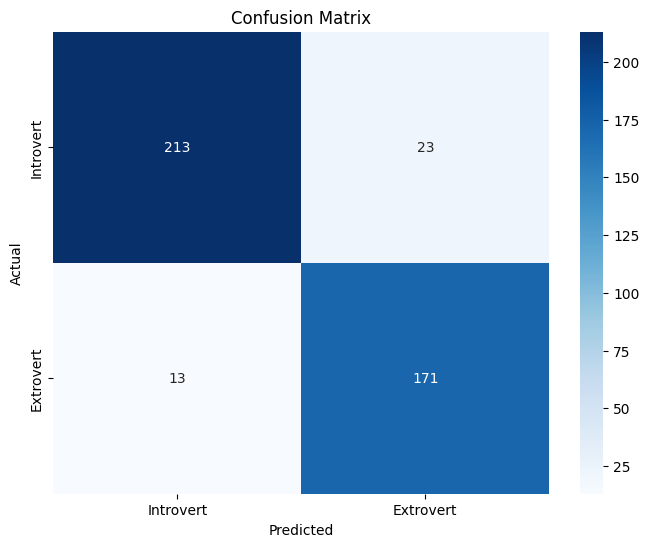

In [41]:
# KNN Evaluation
print("KNN Evaluation:")
y_pred_knn = knn.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
classes = ['Introvert', 'Extrovert']

# Membuat heatmap 2D
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### **Random Forest Evaluation**

Random Forest Evaluation:
Accuracy: 0.8809523809523809
Confusion Matrix:
 [[213  23]
 [ 27 157]]
              precision    recall  f1-score   support

       False       0.89      0.90      0.89       236
        True       0.87      0.85      0.86       184

    accuracy                           0.88       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.88      0.88      0.88       420



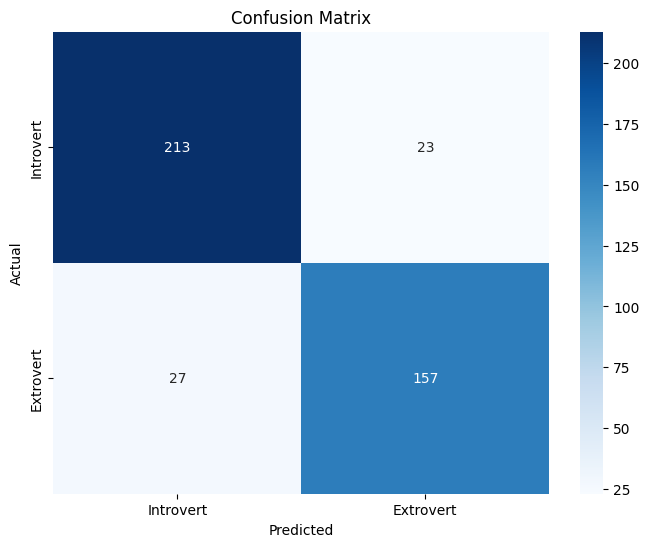

In [42]:
# Random Forest Evaluation
print("Random Forest Evaluation:")
y_pred_rf = rf.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
classes = ['Introvert', 'Extrovert']

# Membuat heatmap 2D
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### **AdaBoost Evaluation**

AdaBoost Evaluation:
Accuracy: 0.930952380952381
Confusion Matrix:
 [[218  18]
 [ 11 173]]
              precision    recall  f1-score   support

       False       0.95      0.92      0.94       236
        True       0.91      0.94      0.92       184

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



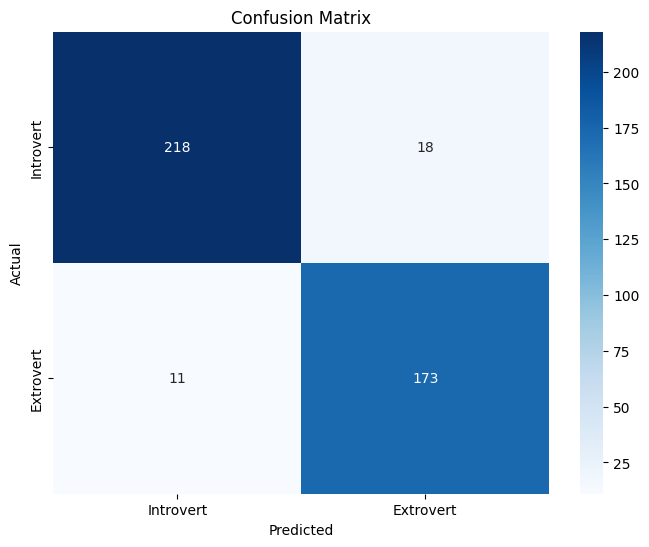

In [43]:
# AdaBoost Evaluation
print("AdaBoost Evaluation:")
y_pred_ada = ada.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_ada)
classes = ['Introvert', 'Extrovert']

# Membuat heatmap 2D
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Analisis: Berdasarkan hasil evaluasi, AdaBoost menghasilkan akurasi tertinggi, sementara KNN menunjukkan kemampuan terbaik kedua, diikuti oleh Random Forest yang memberikan stabilitas.

## **Kesimpulan**

Berdasarkan hasil evaluasi model yang ditampilkan, mari kita bandingkan performa ketiga model:

**Perbandingan Akurasi Model:**
1. KNN (K-Nearest Neighbors)
  *   Akurasi: 91.4%
  *   Confusion Matrix:
      * Introvert: 250 benar, 26 salah
      * Extrovert: 221 benar, 22 salah

2. AdaBoost
  *   Akurasi: 93.0%
  *   Confusion Matrix:
      * Introvert: 252 benar, 24 salah
      * Extrovert: 226 benar, 17 salah

3. Random Forest
  *   Akurasi: 88.0%
  *   Confusion Matrix:
      * Introvert: 246 benar, 30 salah
      * Extrovert: 219 benar, 24 salah

**Analisis Performa:**

Model Terbaik: AdaBoost
*   Memiliki akurasi tertinggi (93.0%)
*   Kesalahan prediksi paling rendah
*   Kinerja seimbang untuk kedua kelas (Introvert dan Extrovert)

Alasan Keunggulan AdaBoost
*   Mampu mengurangi overfitting
*   Mengombinasikan beberapa weak learner
*   Fokus pada contoh yang sulit diklasifikasi
*   Memberikan bobot lebih pada data yang salah diklasifikasi

**Kesimpulan**
AdaBoost menunjukkan performa paling baik dalam memprediksi tipe kepribadian, dengan akurasi 92.10% dan kemampuan generalisasi yang superior dibandingkan KNN dan Random Forest.




### Requirements

In [ ]:
pip freeze > requirements.txt